# データ分析

In [1]:
!pwd

/Users/makino/Kaggle/FX


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
!cp /Users/makino/Downloads/archive.zip .

In [4]:
!cp /Users/makino/Downloads/Foreign_Exchange_Rates.csv .

In [5]:
#!echo y | conda install keras
#!echo y | conda install tensorflow

In [6]:
#!unzip archive.zip

In [7]:
import pandas as pd
import pandas as pd
import numpy as np
from scipy import signal
from scipy import stats
from matplotlib import mlab
import matplotlib.pyplot as plt
from scipy import stats

df_time = pd.read_csv('./Foreign_Exchange_Rates.csv')

In [8]:
df_time = df_time.replace('ND', np.nan)
df_time = df_time.dropna()

In [9]:
df_time.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [10]:
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定

In [11]:
AU_US = df_time.loc[:, ['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$']]

In [12]:
AU_US.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$
0,2000-01-03,1.5172
1,2000-01-04,1.5239
2,2000-01-05,1.5267
3,2000-01-06,1.5291
4,2000-01-07,1.5272


In [13]:
AU_US['AUSTRALIA - AUSTRALIAN DOLLAR/US$'] = AU_US['AUSTRALIA - AUSTRALIAN DOLLAR/US$'].astype(float)
AU_US['Time Serie'] = pd.to_datetime(AU_US['Time Serie'])

#AU_US['AUSTRALIA - AUSTRALIAN DOLLAR/US$'] = AU_US[AU_US['AUSTRALIA - AUSTRALIAN DOLLAR/US$'] != 'ND']

In [14]:
AU_US = AU_US.set_index('Time Serie')

In [15]:
AU_US.head()
AU_US.dtypes

AUSTRALIA - AUSTRALIAN DOLLAR/US$    float64
dtype: object

<AxesSubplot:xlabel='Time Serie'>

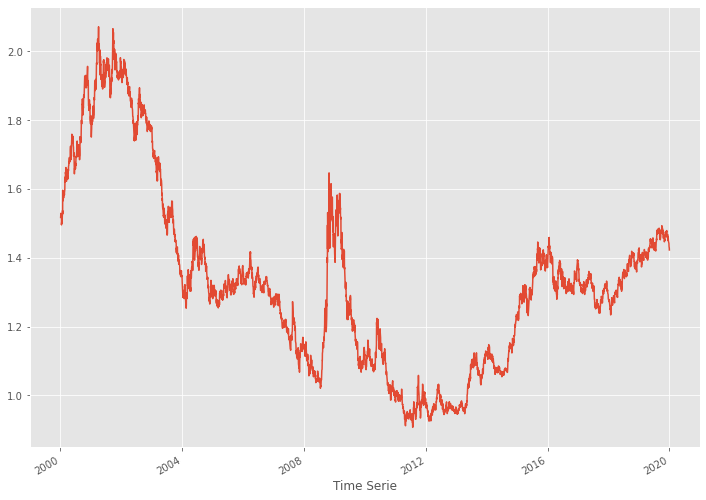

In [16]:
AU_US['AUSTRALIA - AUSTRALIAN DOLLAR/US$'].plot()

In [17]:
AU_US['mean_5'] = AU_US['AUSTRALIA - AUSTRALIAN DOLLAR/US$'].rolling(3).mean()

In [18]:
for ch in ['5', '10', '30', '50']:
    AU_US[f'mean_{ch}'] = AU_US['AUSTRALIA - AUSTRALIAN DOLLAR/US$'].rolling(int(ch)).mean()

In [19]:
AU_US.head(30)

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,mean_5,mean_10,mean_30,mean_50
Time Serie,,,,,
2000-01-03,1.5172,NaN,NaN,NaN,NaN
2000-01-04,1.5239,NaN,NaN,NaN,NaN
2000-01-05,1.5267,NaN,NaN,NaN,NaN
2000-01-06,1.5291,NaN,NaN,NaN,NaN
2000-01-07,1.5272,1.52482,NaN,NaN,NaN
2000-01-10,1.5242,1.52622,NaN,NaN,NaN
2000-01-11,1.5209,1.52562,NaN,NaN,NaN
2000-01-12,1.5202,1.52432,NaN,NaN,NaN
2000-01-13,1.4954,1.51758,NaN,NaN,NaN


In [20]:
AU_US_zs = pd.DataFrame(stats.zscore(AU_US['AUSTRALIA - AUSTRALIAN DOLLAR/US$']), columns=['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])

In [21]:
AU_US_zs

,AUSTRALIA - AUSTRALIAN DOLLAR/US$
Time Serie,
2000-01-03,0.685469
2000-01-04,0.710288
2000-01-05,0.720661
2000-01-06,0.729551
2000-01-07,0.722513
...,...
2019-12-24,0.416157
2019-12-26,0.403562
2019-12-27,0.373926


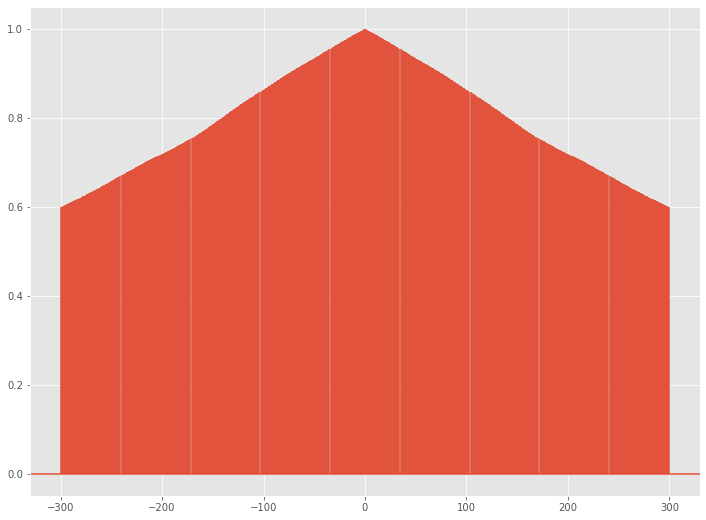

In [22]:
acor_value = plt.acorr(AU_US_zs['AUSTRALIA - AUSTRALIAN DOLLAR/US$'], 
                       detrend=mlab.detrend_linear, 
                       maxlags=300)
plt.show()

In [23]:
#df_time = df_time[df_time['AUSTRALIA - AUSTRALIAN DOLLAR/US$'] != 'ND']
df_time['Time Serie'] = pd.to_datetime(df_time['Time Serie'])
df_time = df_time.set_index('Time Serie')
df_time = df_time.astype(float)
df_time = df_time.iloc[:, 1:]

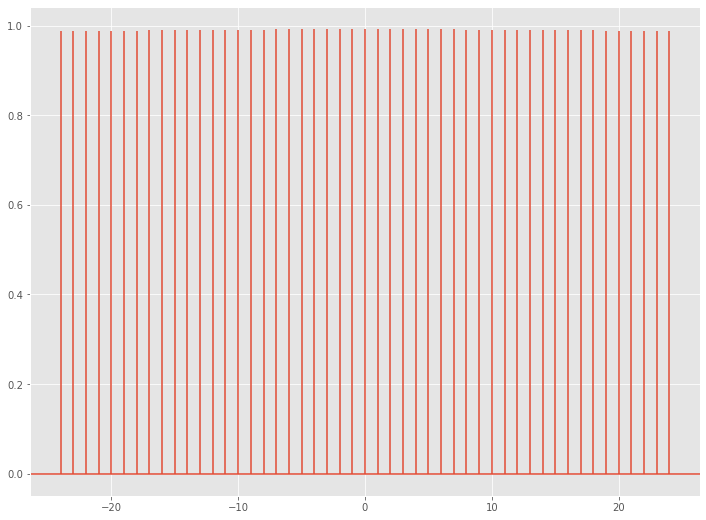

In [24]:
xcor_value = plt.xcorr(df_time['AUSTRALIA - AUSTRALIAN DOLLAR/US$'], 
                       df_time['THAILAND - BAHT/US$'],
                       detrend=mlab.detrend_none, 
                       maxlags=24)
plt.show()

<AxesSubplot:xlabel='Time Serie'>

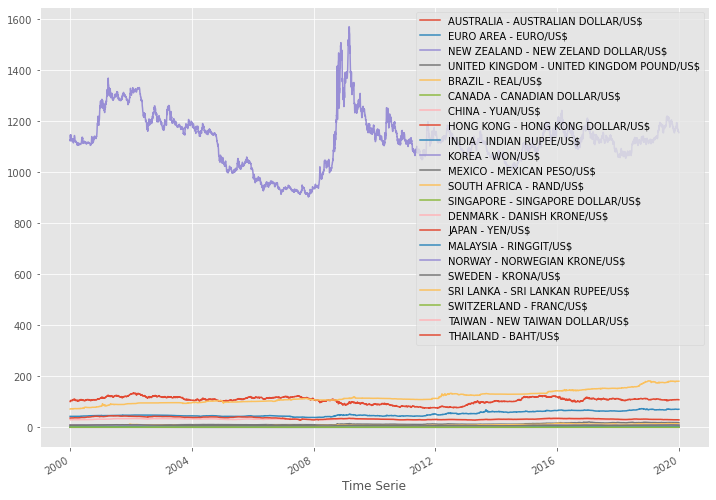

In [25]:
df_time.plot()

In [26]:
X_df = df_time['JAPAN - YEN/US$'] 

In [27]:
X_df.head()

Time Serie
2000-01-03    101.70
2000-01-04    103.09
2000-01-05    103.77
2000-01-06    105.19
2000-01-07    105.17
Name: JAPAN - YEN/US$, dtype: float64

<AxesSubplot:xlabel='Time Serie'>

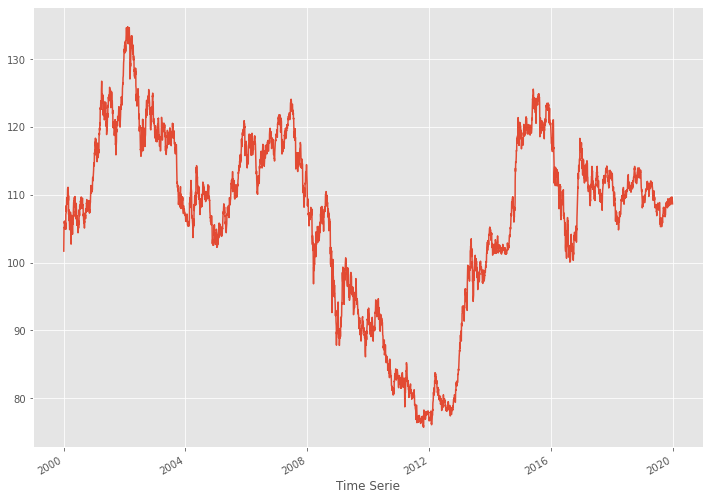

In [28]:
X_df.plot()

# LSTMの実装

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
import keras

In [31]:
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler

In [32]:
L = len(df_time)
print(L)

5015


[101.7  103.09 103.77 ... 109.47 108.85 108.67]
[[101.7 ]
 [103.09]
 [103.77]
 ...
 [109.47]
 [108.85]
 [108.67]]
[[101.7 ]
 [103.09]
 [103.77]
 ...
 [109.39]
 [109.38]
 [109.67]]
[[101.7  103.09 103.77]
 [103.09 103.77 105.19]
 [103.77 105.19 105.17]
 ...
 [109.39 109.38 109.67]
 [109.38 109.67 109.47]
 [109.67 109.47 108.85]]
[[[101.7  103.09 103.77]]

 [[103.09 103.77 105.19]]

 [[103.77 105.19 105.17]]

 ...

 [[109.39 109.38 109.67]]

 [[109.38 109.67 109.47]]

 [[109.67 109.47 108.85]]]
5012
[[105.19]
 [105.17]
 [105.28]
 ...
 [109.47]
 [108.85]
 [108.67]]
Epoch 1/300
32/32 [==============================] - 2s 18ms/step - loss: 10784.9736 - mean_absolute_error: 103.2678
Epoch 2/300
32/32 [==============================] - 1s 17ms/step - loss: 8582.0273 - mean_absolute_error: 91.7372
Epoch 3/300
32/32 [==============================] - 1s 18ms/step - loss: 6904.7178 - mean_absolute_error: 81.6094
Epoch 4/300
32/32 [==============================] - 1s 17ms/step - loss: 5384.6265 

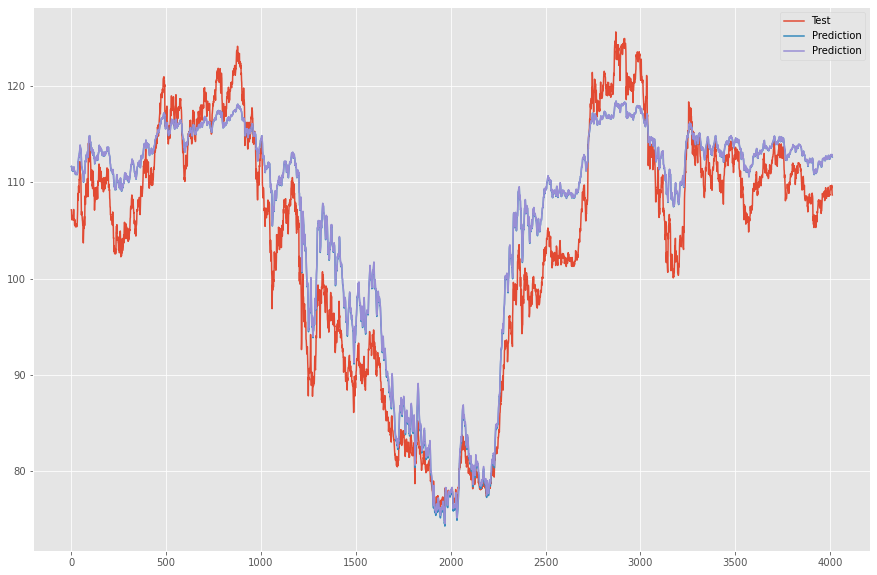

In [33]:
L = len(df_time)
Y = np.array(X_df)  # numpy配列に変換する。
print(Y)
Y = Y.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）
print(Y)
X1 = Y[0:L-3, :]  # 予測対象日の3日前のデータ
print(X1)
X2 = Y[1:L-2, :]  # 予測対象日の2日前のデータ
X3 = Y[2:L-1, :]  # 予測対象日の前日データ
Y = Y[3:L, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。
print(X)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。
print(X)
print(len(X))
print(Y)
# train, testデータを定義
X_train = X[:1000, :, :]
X_test = X[1000:, :, :]
Y_train = Y[:1000, :]
Y_test = Y[1000:, :]

model = Sequential()
model.add(LSTM(1000, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))
model.add(Dense(2))
model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train, Y_train, epochs=300, verbose=1)
Predict = model.predict(X_test)

# タイムインデックスを付ける。
Y_train = pd.DataFrame(Y_train)
#Y_train.index = pd.to_datetime(X_df.iloc[3:193,0])
Y_test = pd.DataFrame(Y_test)
#Y_test.index = pd.to_datetime(X_df.iloc[193:,0])
Predict = pd.DataFrame(Predict)
#Predict.index=pd.to_datetime(X_df.iloc[193:,0])
plt.figure(figsize=(15,10))
plt.plot(Y_test, label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()

# LightGBMの実装

In [34]:
import lightgbm as lgb
import seaborn as sns
from sklearn.model_selection import train_test_split

In [35]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')                             # y軸のタイトル

In [36]:
# パラメータの準備
params = {
    'boosting_type':'gbdt',
    'objective':'binary',
    'metric':'auc',
    'num_leaves':16,
    'learning_rate':0.1,
    'n_estimators':100000,
    'random_state':0
}
# インスタンスの作成clf = lgb.LGBMClassifier(**params)

In [37]:
df_time

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.00,...,1.6563,7.3290,101.70,3.8000,7.9640,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.50,...,1.6535,7.2180,103.09,3.8000,7.9340,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.00,...,1.6560,7.2080,103.77,3.8000,7.9350,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.50,...,1.6655,7.2125,105.19,3.8000,7.9400,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.00,...,1.6625,7.2285,105.17,3.8000,7.9660,8.4150,73.15,1.5623,30.85,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1.4445,0.9022,1.5058,0.7719,4.0833,1.3160,7.0064,7.7872,71.23,1163.21,...,1.3550,6.7399,109.38,4.1350,8.9142,9.4133,181.30,0.9807,30.14,30.15
2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.7880,71.28,1161.18,...,1.3540,6.7295,109.67,4.1337,8.8799,9.4108,181.30,0.9808,30.11,30.15
2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,1160.87,...,1.3520,6.6829,109.47,4.1260,8.8291,9.3405,181.35,0.9741,30.09,30.14


In [38]:
X_df = df_time.astype(float)

In [39]:
X_df.head()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [40]:
X_df['mean_30'] = df_time['JAPAN - YEN/US$'].rolling(30).mean()

In [41]:
X_df.head()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,...,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,mean_30
Time Serie,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,...,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97,NaN
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,...,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13,NaN
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,...,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10,NaN
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,...,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62,NaN
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,...,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30,NaN


In [42]:
X_df = X_df.dropna()

In [43]:
y = X_df.loc[:, ['JAPAN - YEN/US$']]
X = X_df[X_df.columns[X_df.columns != 'JAPAN - YEN/US$']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=2)

In [44]:
y.head()

,JAPAN - YEN/US$
Time Serie,
2000-02-14,108.65
2000-02-15,108.75
2000-02-16,109.38
2000-02-17,110.27
2000-02-18,110.88


In [45]:
X.head()

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,mean_30
Time Serie,,,,,,,,,,,,,,,,,,,,,
2000-02-14,1.5926,1.0222,2.0542,0.6293,1.769,1.4547,8.2779,7.7800,43.65,1128.0,...,1.6975,7.6120,3.8,8.2480,8.6790,73.65,1.6435,30.720,37.49,106.376000
2000-02-15,1.5873,1.0169,2.0534,0.6270,1.783,1.4585,8.2777,7.7810,43.64,1128.0,...,1.6960,7.5743,3.8,8.2515,8.6800,73.75,1.6330,30.750,37.52,106.611000
2000-02-16,1.5870,1.0161,2.0412,0.6234,1.775,1.4520,8.2777,7.7814,43.75,1126.0,...,1.7033,7.5670,3.8,8.2390,8.6695,73.41,1.6302,30.720,37.70,106.820667
2000-02-17,1.5823,1.0139,2.0255,0.6231,1.777,1.4522,8.2772,7.7815,43.68,1128.0,...,1.7060,7.5550,3.8,8.2850,8.6800,73.65,1.6274,30.720,37.77,107.037333
2000-02-18,1.5893,1.0152,2.0371,0.6256,1.777,1.4512,8.2772,7.7808,43.68,1129.0,...,1.7058,7.5610,3.8,8.2570,8.6725,73.36,1.6282,30.765,38.11,107.227000


In [46]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression', # 目的 : 回帰  
        'metric': {'rmse'}, # 評価指標 : rsme(平均二乗誤差の平方根) 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5607
[LightGBM] [Info] Number of data points in the train set: 3988, number of used features: 22
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 106.491046
[1]	valid_0's rmse: 11.9835
[2]	valid_0's rmse: 10.8177
[3]	valid_0's rmse: 9.7708
[4]	valid_0's rmse: 8.83444
[5]	valid_0's rmse: 7.98997
[6]	valid_0's rmse: 7.23388
[7]	valid_0's rmse: 6.55721
[8]	valid_0's rmse: 5.94802
[9]	valid_0's rmse: 5.40569
[10]	valid_0's rmse: 4.91566
[11]	valid_0's rmse: 4.47734
[12]	valid_0's rmse: 4.08912
[13]	valid_0's rmse: 3.73763
[14]	valid_0's rmse: 3.42645
[15]	valid_0's rmse: 3.14985
[16]	valid_0's rmse: 2.90326
[17]	valid_0's rmse: 2.685
[18]	valid_0'

In [47]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(X_df.drop('JAPAN - YEN/US$',axis=1).columns)         # 特徴量名のリスト(目的変数CRIM以外)
f_importance = np.array(model.feature_importance()) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance)  # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

,feature,importance
21,mean_30,0.132333
9,KOREA - WON/US$,0.072667
18,SWITZERLAND - FRANC/US$,0.063333
12,SINGAPORE - SINGAPORE DOLLAR/US$,0.055667
20,THAILAND - BAHT/US$,0.048667
17,SRI LANKA - SRI LANKAN RUPEE/US$,0.048000
19,TAIWAN - NEW TAIWAN DOLLAR/US$,0.048000
7,HONG KONG - HONG KONG DOLLAR/US$,0.047333
10,MEXICO - MEXICAN PESO/US$,0.046000
3,UNITED KINGDOM - UNITED KINGDOM POUND/US$,0.045667


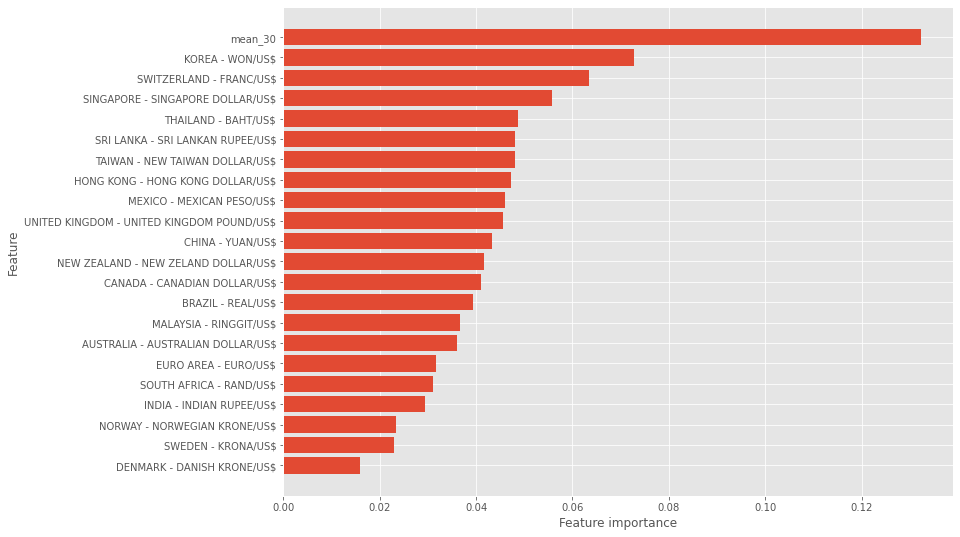

In [48]:
plot_feature_importance(df_importance)

# 多変量LSTM

In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, RNN, GRU
from tensorflow.keras.layers import Dropout, Conv1D, MaxPool1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [54]:
df_time

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.00,...,1.6563,7.3290,101.70,3.8000,7.9640,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.50,...,1.6535,7.2180,103.09,3.8000,7.9340,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.00,...,1.6560,7.2080,103.77,3.8000,7.9350,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.50,...,1.6655,7.2125,105.19,3.8000,7.9400,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.00,...,1.6625,7.2285,105.17,3.8000,7.9660,8.4150,73.15,1.5623,30.85,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,1.4445,0.9022,1.5058,0.7719,4.0833,1.3160,7.0064,7.7872,71.23,1163.21,...,1.3550,6.7399,109.38,4.1350,8.9142,9.4133,181.30,0.9807,30.14,30.15
2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.7880,71.28,1161.18,...,1.3540,6.7295,109.67,4.1337,8.8799,9.4108,181.30,0.9808,30.11,30.15
2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,1160.87,...,1.3520,6.6829,109.47,4.1260,8.8291,9.3405,181.35,0.9741,30.09,30.14


In [59]:
dataset = df_time.loc[:, ['KOREA - WON/US$', 'SWITZERLAND - FRANC/US$',  'JAPAN - YEN/US$']]

In [60]:
dataset

,KOREA - WON/US$,SWITZERLAND - FRANC/US$,JAPAN - YEN/US$
Time Serie,,,
2000-01-03,1128.00,1.5808,101.70
2000-01-04,1122.50,1.5565,103.09
2000-01-05,1135.00,1.5526,103.77
2000-01-06,1146.50,1.5540,105.19
2000-01-07,1138.00,1.5623,105.17
...,...,...,...
2019-12-24,1163.21,0.9807,109.38
2019-12-26,1161.18,0.9808,109.67
2019-12-27,1160.87,0.9741,109.47


In [66]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = pd.DataFrame(scaler.fit_transform(dataset), index=df_time.index, columns=['KOREA - WON/US$', 'SWITZERLAND - FRANC/US$', 'JAPAN - YEN/US$'])

In [67]:
dataset

,KOREA - WON/US$,SWITZERLAND - FRANC/US$,JAPAN - YEN/US$
Time Serie,,,
2000-01-03,0.337082,0.777068,0.439966
2000-01-04,0.328835,0.754884,0.463506
2000-01-05,0.347578,0.751324,0.475021
2000-01-06,0.364822,0.752602,0.499069
2000-01-07,0.352077,0.760179,0.498730
...,...,...,...
2019-12-24,0.389879,0.229231,0.570025
2019-12-26,0.386835,0.229323,0.574936
2019-12-27,0.386370,0.223206,0.571550


In [68]:
# 何回ラグを発生させるかを示す。下の例だと3回
number_of_lag = 3

# 特徴量作成のための処理　シフト関数を使い、ずらしてから横に結合
df_lag_X = pd.DataFrame()
for i in range(1, number_of_lag):
    df_lag_X['x_lag{}'.format(i)] = dataset['KOREA - WON/US$'].shift(i)

df_lag_Y = pd.DataFrame()
for i in range(1, number_of_lag):
    df_lag_Y['y_lag{}'.format(i)] = dataset['SWITZERLAND - FRANC/US$'].shift(i)

In [69]:
# ラグなしの元の列と結合
df_korea = pd.concat([dataset['KOREA - WON/US$'], df_lag_X], axis=1)
df_swither = pd.concat([dataset['SWITZERLAND - FRANC/US$'], df_lag_Y], axis=1)


# Nanの処理
df_korea.dropna(inplace=True)
df_swither.dropna(inplace=True)

In [70]:
df_korea

,KOREA - WON/US$,x_lag1,x_lag2
Time Serie,,,
2000-01-05,0.347578,0.328835,0.337082
2000-01-06,0.364822,0.347578,0.328835
2000-01-07,0.352077,0.364822,0.347578
2000-01-10,0.345329,0.352077,0.364822
2000-01-11,0.365572,0.345329,0.352077
...,...,...,...
2019-12-24,0.389879,0.390523,0.385515
2019-12-26,0.386835,0.389879,0.390523
2019-12-27,0.386370,0.386835,0.389879


In [71]:
df_swither

,SWITZERLAND - FRANC/US$,y_lag1,y_lag2
Time Serie,,,
2000-01-05,0.751324,0.754884,0.777068
2000-01-06,0.752602,0.751324,0.754884
2000-01-07,0.760179,0.752602,0.751324
2000-01-10,0.767573,0.760179,0.752602
2000-01-11,0.758536,0.767573,0.760179
...,...,...,...
2019-12-24,0.229231,0.230418,0.230783
2019-12-26,0.229323,0.229231,0.230418
2019-12-27,0.223206,0.229323,0.229231


In [83]:
# rehsapeで一列にする
korea = np.array(df_korea).reshape(-1, number_of_lag)
swither = np.array(df_swither).reshape(-1, number_of_lag)

In [84]:
korea

array([[0.34757835, 0.32883491, 0.33708202],
       [0.36482231, 0.34757835, 0.32883491],
       [0.35207677, 0.36482231, 0.34757835],
       ...,
       [0.38636977, 0.38683461, 0.38987854],
       [0.37869246, 0.38636977, 0.38683461],
       [0.37825761, 0.37869246, 0.38636977]])

In [85]:
swither

array([[0.75132372, 0.75488406, 0.77706774],
       [0.75260179, 0.75132372, 0.75488406],
       [0.76017893, 0.75260179, 0.75132372],
       ...,
       [0.22320613, 0.22932262, 0.22923133],
       [0.21736352, 0.22320613, 0.22932262],
       [0.21736352, 0.21736352, 0.22320613]])

In [86]:
# [batch, timesteps, feature]の形にする
input_format = []
_format1 = []

for j in range(0, len(df_korea)):
    for i in range(0, number_of_lag):
        _tentative = ([korea[j][i], swither[j][i]])
        _format1 .append(_tentative)
    input_format.append(_format1)
    _format1 = []

input_format = np.array(input_format)

In [87]:
input_format

array([[[0.34757835, 0.75132372],
        [0.32883491, 0.75488406],
        [0.33708202, 0.77706774]],

       [[0.36482231, 0.75260179],
        [0.34757835, 0.75132372],
        [0.32883491, 0.75488406]],

       [[0.35207677, 0.76017893],
        [0.36482231, 0.75260179],
        [0.34757835, 0.75132372]],

       ...,

       [[0.38636977, 0.22320613],
        [0.38683461, 0.22932262],
        [0.38987854, 0.22923133]],

       [[0.37869246, 0.21736352],
        [0.38636977, 0.22320613],
        [0.38683461, 0.22932262]],

       [[0.37825761, 0.21736352],
        [0.37869246, 0.21736352],
        [0.38636977, 0.22320613]]])

In [88]:
print(input_format.shape)

(5013, 3, 2)


In [89]:
# 目的変数のデータを用意
y = pd.concat([dataset['JAPAN - YEN/US$']], axis=1)

In [90]:
y

,JAPAN - YEN/US$
Time Serie,
2000-01-03,0.439966
2000-01-04,0.463506
2000-01-05,0.475021
2000-01-06,0.499069
2000-01-07,0.498730
...,...
2019-12-24,0.570025
2019-12-26,0.574936
2019-12-27,0.571550


In [91]:
y = y[number_of_lag-1:]

In [92]:
y

,JAPAN - YEN/US$
Time Serie,
2000-01-05,0.475021
2000-01-06,0.499069
2000-01-07,0.498730
2000-01-10,0.500593
2000-01-11,0.514310
...,...
2019-12-24,0.570025
2019-12-26,0.574936
2019-12-27,0.571550


In [129]:
# データスプリット
train_X, test_X, train_y, test_y = train_test_split(input_format, y, shuffle=False)

early = keras.callbacks.EarlyStopping(monitor='val_loss',
                                      verbose=1,
                                      mode='auto')

cp_callback = keras.callbacks.ModelCheckpoint(
      filepath="/training_keras/checkpoint",
      verbose=1,
      monitor="val_loss",
      save_weights_only=True,
      save_best_only=True,
      period=3)

train_X = np.array(train_X)
train_y = np.array(train_y)

In [130]:
# Model作成
# LSTMモデル作成の時の注意点
# データの順番が新しい時間のデータから古い時間の順になっているため(t, t-1, t-2,..)
# LSTMのオプションにgo_backwards=Trueを付ける必要があります。付けたくない場合は、順番を逆に変更。

inputs1 = Input(shape=(train_X.shape[1], train_X.shape[2]))
lstm = LSTM(16, go_backwards=True)(inputs1)
drop2 = Dropout(0.2)(lstm)
d1 = Dense(10)(drop2)
outputs = Dense(1)(d1)

model = keras.Model(inputs=inputs1, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["categorical_accuracy"],)

In [131]:
# 学習
'''
history = model.fit(train_X,
                    train_y,
                    validation_split=0.1,
                    batch_size=5,
                    epochs=20,
                    verbose=2,
                    callbacks=[cp_callback, early])
'''
history = model.fit(train_X,
                    train_y,
                    validation_split=0.1,
                    batch_size=5,
                    epochs=10,
                    verbose=2)

pred_y = model.predict(test_X)
print(pred_y)

Epoch 1/10
677/677 - 3s - loss: 0.6343 - categorical_accuracy: 1.0000 - val_loss: 0.9352 - val_categorical_accuracy: 1.0000 - 3s/epoch - 5ms/step
Epoch 2/10
677/677 - 1s - loss: 0.6000 - categorical_accuracy: 1.0000 - val_loss: 0.8482 - val_categorical_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 3/10
677/677 - 1s - loss: 0.5962 - categorical_accuracy: 1.0000 - val_loss: 0.8093 - val_categorical_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 4/10
677/677 - 1s - loss: 0.6002 - categorical_accuracy: 1.0000 - val_loss: 0.7130 - val_categorical_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 5/10
677/677 - 1s - loss: 0.5843 - categorical_accuracy: 1.0000 - val_loss: 0.6959 - val_categorical_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 6/10
677/677 - 1s - loss: 0.6114 - categorical_accuracy: 1.0000 - val_loss: 0.8968 - val_categorical_accuracy: 1.0000 - 1s/epoch - 2ms/step
Epoch 7/10
677/677 - 1s - loss: 0.5854 - categorical_accuracy: 1.0000 - val_loss: 0.8643 - val_categorical_accuracy: 1.0000 

In [132]:
pred_y

array([[0.21891758],
       [0.21923143],
       [0.2229357 ],
       ...,
       [0.15361175],
       [0.1485565 ],
       [0.14726102]], dtype=float32)

In [133]:
test_y

,JAPAN - YEN/US$
Time Serie,
2014-12-23,0.761389
2014-12-24,0.757494
2014-12-29,0.759526
2014-12-30,0.738696
2014-12-31,0.747333
...,...
2019-12-24,0.570025
2019-12-26,0.574936
2019-12-27,0.571550


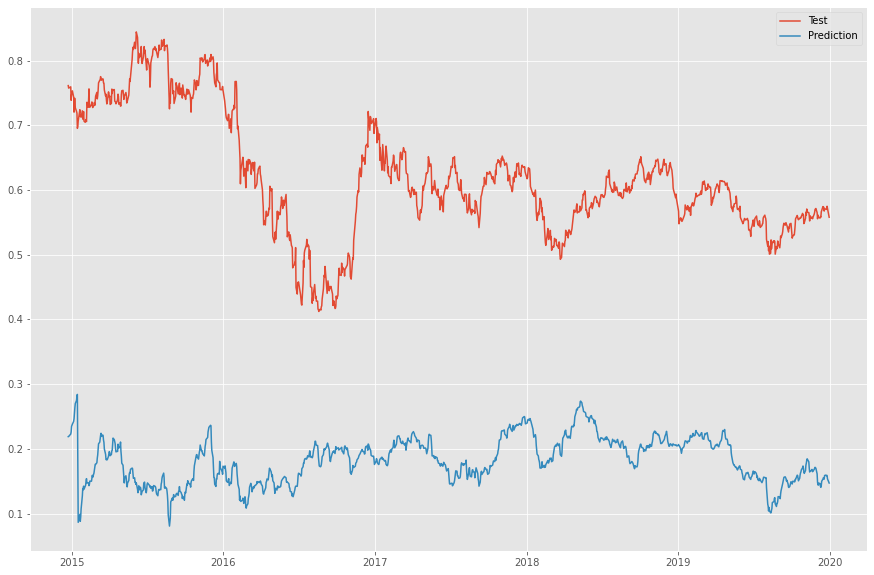

In [134]:
#Y_train = pd.DataFrame(Y_train)
#Y_train.index = pd.to_datetime(X_df.iloc[3:193,0])
Y_test = pd.DataFrame(test_y)
#Y_test.index = pd.to_datetime(X_df.iloc[193:,0])
Predict = pd.DataFrame(pred_y, index=test_y.index)
#Predict.index=pd.to_datetime(X_df.iloc[193:,0])
plt.figure(figsize=(15,10))
plt.plot(Y_test, label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()

# 単変量LSTM

In [137]:
dataset = df_time.loc[:, ['JAPAN - YEN/US$']]

In [138]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = pd.DataFrame(scaler.fit_transform(dataset), index=df_time.index, columns=['JAPAN - YEN/US$'])

In [140]:
# 何回ラグを発生させるかを示す。下の例だと3回
number_of_lag = 3

# 特徴量作成のための処理　シフト関数を使い、ずらしてから横に結合
df_lag_X = pd.DataFrame()
for i in range(1, number_of_lag):
    df_lag_X['x_lag{}'.format(i)] = dataset['JAPAN - YEN/US$'].shift(i)

In [142]:
# ラグなしの元の列と結合
df_japan = pd.concat([dataset['JAPAN - YEN/US$'], df_lag_X], axis=1)


# Nanの処理
df_japan.dropna(inplace=True)
df_swither.dropna(inplace=True)

In [143]:
df_japan

,JAPAN - YEN/US$,x_lag1,x_lag2
Time Serie,,,
2000-01-05,0.475021,0.463506,0.439966
2000-01-06,0.499069,0.475021,0.463506
2000-01-07,0.498730,0.499069,0.475021
2000-01-10,0.500593,0.498730,0.499069
2000-01-11,0.514310,0.500593,0.498730
...,...,...,...
2019-12-24,0.570025,0.570195,0.571211
2019-12-26,0.574936,0.570025,0.570195
2019-12-27,0.571550,0.574936,0.570025


In [144]:
japan = np.array(df_japan).reshape(-1, number_of_lag)

# [batch, timesteps, feature]の形にする
input_format = []
_format1 = []

for j in range(0, len(df_japan)):
    for i in range(0, number_of_lag):
        _tentative = ([japan[j][i]])
        _format1 .append(_tentative)
    input_format.append(_format1)
    _format1 = []

input_format = np.array(input_format)

In [145]:
input_format

array([[[0.47502117],
        [0.4635055 ],
        [0.43996613]],

       [[0.49906859],
        [0.47502117],
        [0.4635055 ]],

       [[0.49872989],
        [0.49906859],
        [0.47502117]],

       ...,

       [[0.57154953],
        [0.57493649],
        [0.5700254 ]],

       [[0.56104996],
        [0.57154953],
        [0.57493649]],

       [[0.55800169],
        [0.56104996],
        [0.57154953]]])

In [146]:
# 目的変数のデータを用意
y = pd.concat([dataset['JAPAN - YEN/US$']], axis=1)
y = y[number_of_lag-1:]

In [147]:
y

,JAPAN - YEN/US$
Time Serie,
2000-01-05,0.475021
2000-01-06,0.499069
2000-01-07,0.498730
2000-01-10,0.500593
2000-01-11,0.514310
...,...
2019-12-24,0.570025
2019-12-26,0.574936
2019-12-27,0.571550


In [148]:
# データスプリット
train_X, test_X, train_y, test_y = train_test_split(input_format, y, shuffle=False)

early = keras.callbacks.EarlyStopping(monitor='val_loss',
                                      verbose=1,
                                      mode='auto')

cp_callback = keras.callbacks.ModelCheckpoint(
      filepath="/training_keras/checkpoint",
      verbose=1,
      monitor="val_loss",
      save_weights_only=True,
      save_best_only=True,
      period=3)

train_X = np.array(train_X)
train_y = np.array(train_y)

In [149]:
# Model作成
# LSTMモデル作成の時の注意点
# データの順番が新しい時間のデータから古い時間の順になっているため(t, t-1, t-2,..)
# LSTMのオプションにgo_backwards=Trueを付ける必要があります。付けたくない場合は、順番を逆に変更。

inputs1 = Input(shape=(train_X.shape[1], train_X.shape[2]))
lstm = LSTM(16, go_backwards=True)(inputs1)
drop2 = Dropout(0.2)(lstm)
d1 = Dense(10)(drop2)
outputs = Dense(1)(d1)

model = keras.Model(inputs=inputs1, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.01),
              loss="binary_crossentropy",
              metrics=["categorical_accuracy"],)

In [150]:
# 学習
'''
history = model.fit(train_X,
                    train_y,
                    validation_split=0.1,
                    batch_size=5,
                    epochs=20,
                    verbose=2,
                    callbacks=[cp_callback, early])
'''
history = model.fit(train_X,
                    train_y,
                    validation_split=0.1,
                    batch_size=5,
                    epochs=10,
                    verbose=2)

pred_y = model.predict(test_X)
print(pred_y)

Epoch 1/10
677/677 - 2s - loss: 0.5855 - categorical_accuracy: 1.0000 - val_loss: 0.6761 - val_categorical_accuracy: 1.0000 - 2s/epoch - 3ms/step
Epoch 2/10
677/677 - 1s - loss: 0.5957 - categorical_accuracy: 1.0000 - val_loss: 0.6755 - val_categorical_accuracy: 1.0000 - 854ms/epoch - 1ms/step
Epoch 3/10
677/677 - 1s - loss: 0.5774 - categorical_accuracy: 1.0000 - val_loss: 0.6749 - val_categorical_accuracy: 1.0000 - 816ms/epoch - 1ms/step
Epoch 4/10
677/677 - 1s - loss: 0.5848 - categorical_accuracy: 1.0000 - val_loss: 0.6756 - val_categorical_accuracy: 1.0000 - 813ms/epoch - 1ms/step
Epoch 5/10
677/677 - 1s - loss: 0.5785 - categorical_accuracy: 1.0000 - val_loss: 0.6929 - val_categorical_accuracy: 1.0000 - 814ms/epoch - 1ms/step
Epoch 6/10
677/677 - 1s - loss: 0.5732 - categorical_accuracy: 1.0000 - val_loss: 0.6749 - val_categorical_accuracy: 1.0000 - 814ms/epoch - 1ms/step
Epoch 7/10
677/677 - 1s - loss: 0.5865 - categorical_accuracy: 1.0000 - val_loss: 0.6761 - val_categorical_ac